# 2강. 컨텐츠 기반 추천 & 협업 필터링

## 1. 컨텐츠 기반 추천, TF-IDF

### Contents-based Recommendation

### Item Profiling

## 2. 협업 필터링의 원리

### Collaborative Filtering(CF)

- **많은 유저들로부터 얻은 기호 정보**를 이용해 유저의 관심사를 자동으로 예측하게 하는 방법
    - `Collaboratvie` : 집단지성, 다수의 의견을 반영합니다.
- 협업`Collaborative`을 위해선 서로 다른 유저와 서로 다른 기호의 데이터가 필요 $\to$ 이를 통해 성향 비슷한 사람을 파악해 추천이 가능
- 많은 유저들의 데이터가 축적될 수록 집단 지성이 높아지고, 추천은 정확해집니다.
- 추천 시스템에서 많이 쓰이는 하나의 기법

> Example)
1. 이 상품을 구매한 유저가 구맨한 다른 상품들
2. 이 영화를 선호하는 유저가 관람한 다른 영화들

#### 예시


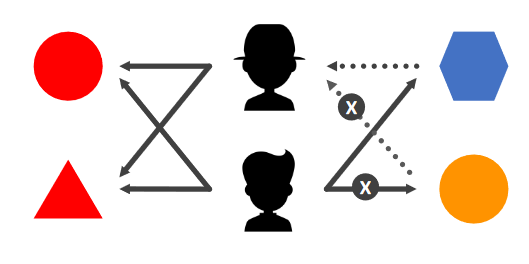

- 유저 A와 비슷한 성향을 가진 유저들이 선호하는 아이템을 추천!
- 아이템이 가진 속성을 사용하지 않으면서도 높은 성능을 보입니다.

> **note**
- 쿠팡 같은 경우엔 구매, PV 등 서로 다른 `지표`에 따라 구분해서 하는 경우 있음
- 피봇 수행 시 유저-아이템에서 아이템-유저로 변함

### Collaboratvie Filtering의 목적

||i1|i2|i3|
|:------:|:------:|:------:|:------:|
|u1|4|3|(예측 필요)|
|u2|(예측 필요)|3|(예측 필요)|

- 행렬 내 빈 값을 `예측`하는 것이 목적이라 보면 됩니다.


#### 방법
1. 주어진 데이터를 활용해 유저-아이템 행렬을 생성
2. `유사도` 기준을 정하고, 유저 혹은 아이템 간의 `유사도`를 구한다.
3. 주어진 평점과 `유사도`를 활용하여 행렬의 비어 있는 값`평점`을 예측합니다.

#### 특징
1. 구현이 간단하고 이해가 쉬움
2. 아이템이나 유저가 계속 늘어날 경우 확장성 저하 $\to$ **Scalabiity**
3. `Sparse`한 데이터의 경우 성능 저하 $\to$ **Spasity**

##### Sparsity
- 유저-아이템 행렬의 전체 `entry` 가운데 비어있는 `비율`
- 주어진 데이터를 활용해 유저-아이템 행렬을 만들 때 행렬의 대부분 `entry`는 비어있습니다. 이러한 행렬을 `Sparse Matrix`라고도 합니다.
- 협업 필터링`Collaborative Filtering`을 적용하려면 적어도 `sparsity`가 **99.5 %**를 넘지 않도록 하는 것이 좋습니다.

## 3. User-based, Item-based

### User-based Collaborative Filtering

- 유저간의 `유사도`를 구하는게 핵심
- 두 유저가 얼마나 유사한 아이템을 선호하는가?
- 유저간의 `유사도`를 구한 뒤, 나와 유사도가 높은 유저들이 선호하는 아이템을 추천합니다.

### 예시

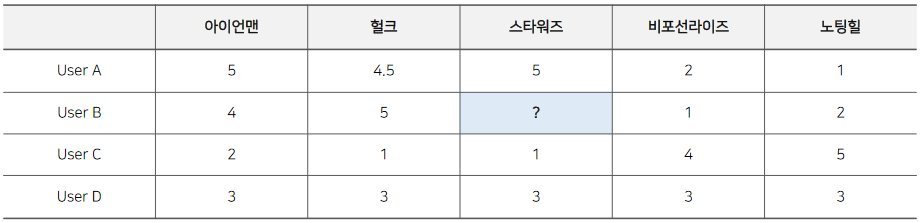

- 직관적으로 `유저 B`는 `유저 A`와 비슷한 취향을 가졌기 때문에 `유저 B`의 `스타워즈`에 대한 선호도는 높을 것으로 예측된다. $\to$ **유저 A와 유저 B의 유사도가 높다`highly correlated`**

### Rating Prediction

#### Average
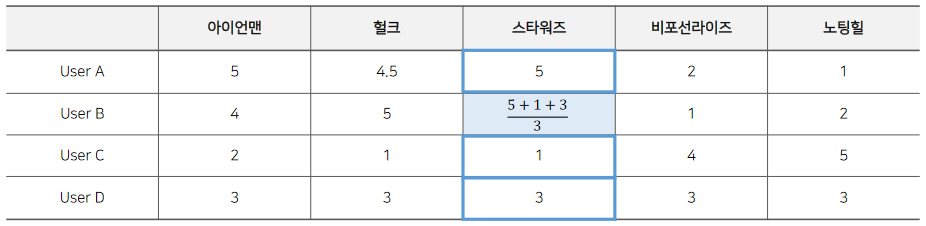


- 다른 유저들의 스타워즈에 대한 `rating`을 모두 사용하여 평균을 냄
- `유저 B`의 입장에서 볼 때 `A`와 `C`의 `rating`을 동일하게 반영합니다.
- 이 경우 `유사도`가 낮은 `C`, `D`에 대한 정보가 반영되어 좋은 결과를 예측하기 어려워 잘 안쓰입니다.

#### Weighted Average

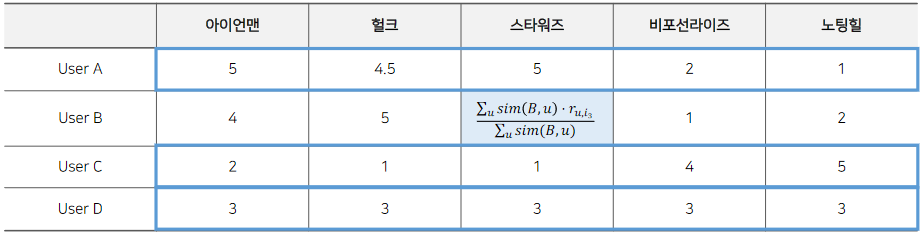

- 유저 간의 `유사도` 값을 `weight`로 사용하여 `rating`의 평균을 냅니다.
- `유저 B`의 입장에서 볼 때, `유저 A`의 `rating`은 많이 반영되고, `유저 C`의 `rating`은 적게 반영되어 예측 평점이 구해집니다.

#### 수식 정리

- 유저 $u \in U$, 아이템 $i \in I$에 대해 평점 데이터 $r(u,i)$가 존재할 때, 유저 $u$의 아이템 $i$에 대한 평점을 예측
- 아이템 $i$에대한 평점이 있으면서 유저 $u$와 유사한 유저들의 집합을 $\varOmega_{i}$라 하면,
    1. Average

    $\hat{r}(u, i) = \frac{\sum_{u' \in \varOmega_{i}}r(u',i)}{\lvert\varOmega_{i}\rvert}$

    2. Weighted Average

    $\hat{r}(u, i) = \frac{\sum_{u' \in \varOmega_{i}}sim(u, u')r(u',i)}{\sum_{u' \in \varOmega_{i}}sim(u, u')}$


##### Note
- **sim** : `유사도` 함수, $sim(B,u)$ $\to$ B: 기준, u : A, C, D
- **$u'$**`prime` : 아이템 $i$를 소비하면서 유저 $u$와 비슷한 성향인 유저
- $\hat{r}$`hat` : 데이터에 대한 정답


#### Absolute Rating의 문제점

$\hat{r}(u, i) = \frac{\sum_{u' \in \varOmega_{i}}r(u',i)}{\lvert\varOmega_{i}\rvert}$

- 서로 평점 기준이 다릅니다. 심지어 성향이 같더라도 이것은 예측하기가 어렵습니다.
    - 긍정파 : 대부분 5점을 주고 부정적인 평가로 3점 부여
    - 부정파 : 대부분 1~2점을 주고 가끔 4점 부여
- 그래서 이를 편차`Deviation`를 통해 해결합니다.


#### Deviation

- 모든 평점 데이터를 `deviation` 데이터로 바꾼 뒤, `predicted rating`이 아닌 `predicted deviation`을 구합니다.
- `predicted deviation` : 유저 평균 `rating` + `predicted deviation`

$
dev(u,i) = r(u, i) - \bar{r_{u'}}\text{, 확인된 평점에 대한 편차} \\
\hat{dev}(u,i) = \frac{\sum_{u' \in \varOmega_{i}}dev(u',i)}{\lvert\varOmega_{i}\rvert} = \frac{\sum_{u' \in \varOmega_{i}}(r(u',i) - \bar{r_{u'}})}{\lvert\varOmega_{i}\rvert} \\
\hat{r}(u,i) = \bar{r_{u}} + \frac{\sum_{u' \in \varOmega_{i}}{r(u',i) - \bar{r_{u'}}}}{\lvert\varOmega_{i}\rvert} = \bar{r_{u}} + \hat{dev}(u,i)
$

#### Weighted Average with deviation

- 편차`deviation`과 `유사도` 기반 `weighted average prediction`을 결합하여 최종 수식을 내면 아래와 같습니다.

1. Using Deviation

 $\hat{r}(u,i) = \bar{r_{u}} + \frac{\sum_{u' \in \varOmega_{i}}sim(u, u'){r(u',i) - \bar{r_{u'}}}}{\sum_{u' \in \varOmega_{i}}sim(u, u')}$

2. Using Absolute Rating

 $\hat{r}(u,i) = \bar{r_{u}} + \frac{\sum_{u' \in \varOmega_{i}}sim(u, u'){r(u',i)}}{\sum_{u' \in \varOmega_{i}}sim(u, u')}$

#### K Nearest Neighbors Collaborative Filtering

- 아이템 $i$에 대한 평점 예측을 위해서는 아이템 $i$에 대한 평가를 한 유저($\varOmega_{i}$)의 데이터를 사용해야 합니다.
    - $\varOmega_{i}$에 속한 모든 유저와의 `유사도`를 구해야 함
- 이때 모든 유저를 사용할 경우 연산은 많아지고 오히려 성능이 저하됩니다`Scalability`
- 그래서 $\varOmega_{i}$에 속한 유저 가운데 유저 $u$와 가장 유사한 `k`명의 유저를 이용해 평점을 예측하는데, 이를 K Nearest Neighbors`KNN` Collaborative Filtering이라고 합니다.
    - '유사'하다는 것은 정의한 `유사도` 값이 '크다'는 것을 의미 $\to$ **0 : `유사도` X, 1 : 완전 동일**
    - 보통 `K = 25~50`를 많이 사용하지만 직접 튜닝해야 하는 하이퍼 파라미터`hyper parameter`입니다.
        - 하이퍼 파라미터`hyper parameter` : 모델링할 때 사용자가 직접 세팅해주는 값


### Item-based Collaborative Filtering

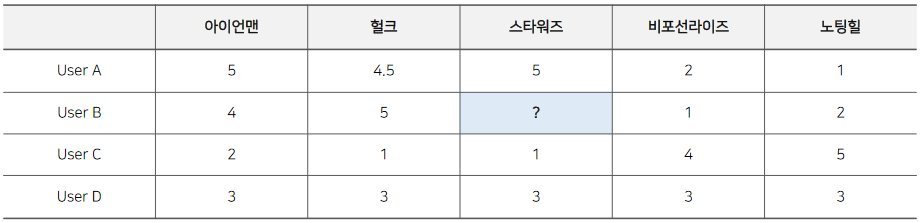

- 두 아이템이 유저로부터 얼마나 유사한 평가를 받았는가?
- 아이템 선호도를 바탕으로 연관성이 높은 다른 아이템을 추천, 아이템 간의 `유사도`를 구합니다.

- 직관적으로 스타워즈는 아이언맨, 헐크와의 유사도가 높습니다. 반대로 비포 선라이즈, 노팅힐은 스타워즈와의 `유사도`가 낮습니다. $\to$ **따라서 `유저 B`의 스타워즈에 대한 평점은 아이언맨, 헐크와 비슷하게 높을 것이다!**

### 예시

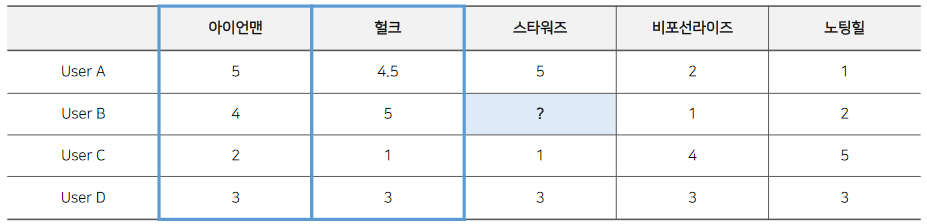

- 스타워즈와 가장 유사도가 큰 아이언맨`0.7`, 헐크`0.9`를 활용해 예측하면 `유저 B`의 스타워즈에 대한 예측 평점은,

 $\frac{0.7 \cdot 4 + 0.9 \cdot 5}{0.7 + 0.9} = 4.6$

### User-based와 동일하게 Rating Prediction

- 유저 $u \in U$, 아이템 $i \in I$에 대해 평점 데이터 $r(u,i)$가 존재할 때, 유저 $u$의 아이템 $i$에 대한 평점을 예측
- 아이템 $i$에대한 평점이 있으면서 유저 $u$와 유사한 유저들의 집합을 $\phi_{i}$라 하면,
    1. Average

    $\hat{r}(u, i) = \frac{\sum_{u' \in \phi_{i}}r(u',i)}{\lvert\phi_{i}\rvert}$

    2. Weighted Average

    $\hat{r}(u, i) = \frac{\sum_{i' \in \phi_{u}}sim(i, i')r(u,i')}{\sum_{i' \in \phi_{u}}sim(i, i')}$


- User-based와 식은 같지만 파라미터가 달라집니다.


1. Average With Deviation

 $\hat{r}(u, i) = \bar{r_{i}} + \frac{\sum_{u' \in \phi_{i}}(r(u',i) - \bar{r_{i'}})}{\lvert\phi_{i}\rvert}$


2. Weighted Average With Deviation

 $\hat{r}(u, i) = \bar{r_{i}} + \frac{\sum_{i' \in \phi_{u}}sim(i, i')(r(u',i) - \bar{r_{i'}})}{\sum_{i' \in \phi_{u}}sim(i, i')}$

### User-based vs. Item-based

#### User-based


- 유사한 Neighborhood의 수 `K`가 늘어날 수록 성능 증가
- `Item-based`보다 더 다양한 추천 결과들이 제공 $\to$ **Diversity**
- `Sparsity`, `Cold Start`에 비교적 취약
- `Pearson 유사도`를 사용할 때 성능이 높음

#### Item-based

- 실제 서비스에서 `user-based`보다 높은 성능을 냅니다
- 아이템 간의 `유사도`를 사용하는 것이 **상치/에러값으로 부터 영향을 크게 받지 않습니다**`Robust`
    - 아이템 기준의 Neighborhood들이 사용자 기준의 Neighborhood보다 덜 변하기 때문
- 추천에 대한 이유를 설명하기 훨씬 쉽습니다
    - 유저가 과거에 선호했던 다른 아이템과 비슷하기 때문에 추천
- `Cosine 유사도`를 사용할 때 성능이 높습니다

#### Note

- 둘다 구현 난이도는 차이는 거의 없습니다
- User가 좀더 다양한거, Item은 인기있는거 위주로 추천해주며 `item`이 높은 성능을 내는 경우가 많습니다
- 케바케로 사용(신규 유입 적은데 아이템이 엄청 많이 증가하는 경우 User-based로 가야함)
- 유사도 성능 평가는 실제 테스트를 해봐야 알 수 있습니다


### Collaborative Filtering의 한계

1. Cold Start
    - 데이터가 충분하지 않으면 추천 성능이 저하됩니다
    - 데이터가 전혀 없는 신규 유저, 아이템의 경우 추천이 '불가능'합니다

2. 계산 효율
    - 유저와 아이템이 늘어날 수록 `유사도` 계산이 늘어납니다
    - 유저, 아이템이 많아야 정확한 예측을 하지만 반대로 시간이 오래 걸립니다

3. Long-tail 추천의 한계
    - 많은 유저들이 선호하는 소수의 아이템이 보통 `CF` 추천 결과로 나타납니다
    - 따라서, `long-tail`을 이루는 비주류의 `item`이 추천되기가 어렵습니다

## 4. 유사도 개념 이해하기

### Cosine Similarity

$cos(\theta) = cos(X, Y) = \frac{X \cdot Y}{\lvert X \rvert\lvert Y \rvert} = \frac{sum_{i=1}^{N} X_{i}Y_{i}}{\sqrt{sum_{i=1}^{N} X_{i}^{2}}\sqrt{sum_{i=1}^{N} Y_{i}^{2}}}$

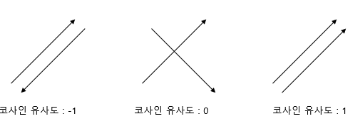

- 주어진 두 벡터 `X`, `Y`에 대한 각도를 이용하여 구할 수 있는 `유사도`
- 직관적으로 두 벡터가 가리키는 `방향`이 얼마나 유사한지를 의미
    - 두 벡터 방향이 비슷할 수록 `1`에 가까움
    - 방향이 정반대일 수록 `-1`에 가까움
- 두 벡터의 차원은 같아야 한다는 전제가 있습니다.
- 가장 많이 쓰이는 `유사도`

### Mean Squared Difference Similarity

- MSD & MSC `유사도`(아이템)

 $msd(u,v) = \frac{1}{\lvert I_{uv} \rvert} \cdot \sum_{i \in I_{uv}}(r_{ui} - r_{vi})^{2}, \text{msd_sim}(u,v) = \frac{1}{msd(u,v) +1}$

- MSD & MSC `유사도`(유저)

 $msd(i,j) = \frac{1}{\lvert U_{ij} \rvert} \cdot \sum_{u \in U_{ij}}(r_{ui} - r_{uj})^{2}, \text{msd_sim}(u,v) = \frac{1}{msd(i,j) +1}$

- 추천시스템에서 가장 많이 사용되는 `유사도`
- 각 기준(유저, 아이템)에 대한 점수의 차이를 계산하며, `유사도`는 `유클리드 거리`에 반비례합니다.
- 분모에 1을 더하는 이유는 **분모가 0이 되는 것을 방지**`Smoothing`
- `Surprise` 라이브러리에서 제공합니다.

### Jaccard Similarity

$J(A,B) = \frac{\lvert A \cap B \rvert}{\lvert A \cup B \rvert} = \frac{\lvert A \cap B \rvert}{\lvert A \rvert + \lvert B \rvert - \lvert A \cap B \rvert}$

- 주어진 집합 `A`, `B`에 대한 집합의 개념을 사용한 `유사도`
- `Cosine`, `Pearson`과 달리 길이가 달라도 이론적으로 `유사도`를 구할 수 있습니다.
- 두 집합이 얼마나 유사한 아이템을 공유하고 있는가를 나타냅니다.
    - 두 집합이 가진 아이템이 모두 같으면 `1`
    - 두 집합이 겹치는 아이템이 하나도 없으면 `0`
- ~~실제로 잘 안쓰입니다~~

### Pearson Similarity

$\text{pearson_sim}(X,Y) = \frac{sum_{i=1}^{N} (X_{i} - \bar{X})(Y_{i} - \bar{Y})}{\sqrt{sum_{i=1}^{N} (X_{i} - \bar{X})^{2}}\sqrt{sum_{i=1}^{N} (Y_{i} - \bar{Y})^{2}}}$

- 주어진 벡터 `X`, `Y`에 대해서 각  벡터를 `표본평균`으로 정규화한 뒤, `cosine 유사도`를 구한 값
- **(X와 Y가 함께 변하는 정도) / (X와 Y가 따로 변하는 정도)**
- `1`에 가까우면 `양의 상관관계`, `0`에 가까우면 서로 `독립`, `-1`에 가까울 수록 `음의 상관관계`를 나타냅니다.

## 실습


- 유사도 계산
- Memory-based = k nearest-based
    - 전체 데이터가 Memory에 올라가 있는 것을 전제로 하기 때문
- spare_matrix에 0을 넣는 이유 -> NaN있으면 못구해... 그래서 편의 상 0 -> 혹은 유저/아이템의 평균값을 넣는 경우 있음, 성능에 따라 알아서~
- 편의상 cross-validation 또는 다르게 할 수 이뜨
- 새로운 유저랑 아이템에 대한 추천은 CF론 할 수 없음
- 아이템끼리 유사도 측정할때가 더 잘나올거 같다! -> 슨새임피셜
- 서프라이즈드 라이브러리 사용
    - 쉽게 사용할 수 있는 추천 시스템 모델 제공
    - Using Prediction Algorithm에 그 종류가 있음 -> alogrithm package
    - cv : cross-validation : 이 개념 쫌더 정리하자잉
    - greed search를 통해 최적의 하이퍼 파라미터를 찾아낸다
    - r_ui: 과거 값을 반환
    - 실시간 서빙을 원하면 threshold를 정해서 넘으면 추천!
    